<a href="https://colab.research.google.com/github/VictorNigretto/Hidoop/blob/master/APP_Etape_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import shutil
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import load_img
from PIL import Image

import matplotlib.pyplot as plt

In [6]:
# Dataset personnes
!git clone https://gitlab.enseeiht.fr/aandre2/Dataset_Market-1501-v15.09.15

# Dataset pokemons
!git clone https://gitlab.enseeiht.fr/nurbani/dataset-pokemon


Cloning into 'Dataset_Market-1501-v15.09.15'...
remote: Counting objects: 77323, done.
remote: Compressing objects: 100% (70371/70371), done.
remote: Total 77323 (delta 6952), reused 77323 (delta 6952)
Receiving objects: 100% (77323/77323), 129.42 MiB | 400.00 KiB/s, done.
Resolving deltas: 100% (6952/6952), done.
Checking out files: 100% (143817/143817), done.
Cloning into 'dataset-pokemon'...
remote: Counting objects: 26364, done.
remote: Compressing objects: 100% (25090/25090), done.
remote: Total 26364 (delta 1274), reused 26364 (delta 1274)
Receiving objects: 100% (26364/26364), 26.87 MiB | 2.68 MiB/s, done.
Resolving deltas: 100% (1274/1274), done.


In [3]:
path_pokemon = "/content/dataset-pokemon/"

In [4]:
#Chemin vers les pokemon qu'on va utiliser
path_1G_red_blue = path_pokemon + "1G-red-blue"
path_1G_red_green = path_pokemon + "1G-red-green"
path_1G_yellow = path_pokemon + "1G-yellow"
path_2G_crystal = path_pokemon + "2G-crystal"
path_2G_gold = path_pokemon + "2G-gold"
path_2G_silver = path_pokemon + "2G-silver"
path_3G_emerald = path_pokemon + "3G-emerald"
path_3G_firered_leafgreen = path_pokemon + "3G-firered-leafgreen"
path_3G_ruby_sapphire = path_pokemon + "3G-ruby-sapphire"
path_4G_diamond_perl = path_pokemon + "4G-diamond-pearl"
path_4G_heartgold_soulsilver = path_pokemon + "4G-heartgold-soulsilver"
path_4G_platinum = path_pokemon + "4G-platinum"
path_5G_black_white = path_pokemon + "5G-black-white"

In [5]:
from keras.preprocessing.image import load_img

#Test de la taille des images de chaque génération
image1 = Image.open(path_1G_red_blue + "/1.png")
plt.imshow(image1)
plt.show()
taille_pokemon_red_blue = np.shape(image1)
print("taille G1 red blue", taille_pokemon_red_blue)

image2 = Image.open(path_1G_red_green + "/1.png")
plt.imshow(image2)
plt.show()
taille_pokemon_red_green = np.shape(image2)
print("taille pokemon red green", taille_pokemon_red_green)

image3 = Image.open(path_1G_yellow + "/1.png")
plt.imshow(image3)
plt.show()
taille_pokemon_yellow = np.shape(image3)
print("taille pokemon yellow", taille_pokemon_yellow)

image4 = Image.open(path_2G_crystal + "/1.png")
plt.imshow(image4)
plt.show()
taille_pokemon_crystal = np.shape(image4)
print("taille pokemon crystal", taille_pokemon_crystal)

image5 = Image.open(path_2G_gold + "/1.png")
plt.imshow(image5)
plt.show()
taille_pokemon_gold = np.shape(image5)
print("taille pokemon gold", taille_pokemon_gold)

image6 = Image.open(path_2G_silver + "/1.png")
plt.imshow(image6)
plt.show()
taille_pokemon_silver = np.shape(image6)
print("taille pokemon silver", taille_pokemon_silver)

image7 = Image.open(path_3G_emerald + "/1.png")
plt.imshow(image7)
plt.show()
taille_pokemon_emerald = np.shape(image7)
print("taille pokemon emerald", taille_pokemon_emerald)

image8 = Image.open(path_3G_firered_leafgreen + "/1.png")
plt.imshow(image8)
plt.show()
taille_pokemon_firered = np.shape(image8)
print("taille pokemon firered", taille_pokemon_firered)

image9 = Image.open(path_3G_ruby_sapphire + "/1.png")
plt.imshow(image9)
plt.show()
taille_pokemon_sapphire = np.shape(image9)
print("taille pokemon sapphire", taille_pokemon_sapphire)

image10 = Image.open(path_4G_diamond_perl + "/1.png")
plt.imshow(image10)
plt.show()
taille_pokemon_diamond_perl = np.shape(image10)
print("taille pokemon diamond", taille_pokemon_diamond_perl)

image11 = Image.open(path_4G_heartgold_soulsilver + "/1.png")
plt.imshow(image11)
plt.show()
taille_pokemon_heartgold = np.shape(image11)
print("taille pokemon heartgold", taille_pokemon_heartgold)

image12 = Image.open(path_4G_platinum + "/1.png")
plt.imshow(image12)
plt.show()
taille_pokemon_platinum = np.shape(image12)
print("taille pokemon platinum", taille_pokemon_platinum)

image13 = Image.open(path_5G_black_white + "/1.png")
plt.imshow(image13)
plt.show()
taille_pokemon_black_white = np.shape(image13)
print("taille pokemon black white", taille_pokemon_black_white)



FileNotFoundError: ignored

Création des ensemble d'apprentissage, test et validation

In [17]:
mysize_x=32
mysize_y=32

In [1]:
# Recuperation des données des 151 premiers pokemons en 13 sets

# labels
labels = np.eye(151)
print("labels shape", np.shape(labels))

# G1
set_1_pokemon = image1.resize((mysize_x, mysize_y))
set_2_pokemon = image2.resize(mysize_x, mysize_y))
set_3_pokemon = image3.resize((ysize_x, mysize_y))

# G2
set_4_pokemon = image4.resize((mysize_x, mysize_y))
set_5_pokemon = image5.resize((mysize_x, mysize_y))
set_6_pokemon = image6.resize((mysize_x, mysize_y))

# G3
set_7_pokemon = image7.resize((mysize_x, mysize_y))
set_8_pokemon = image8.resize((mysize_x, mysze_y))
set_9_pokemon = image9.resize((mysize_x, mysize_y))

# G4
set_10_pokemon = image10.resize((mysize_x, mysize_y))
set_11_pokemon = image11.resize((mysize_x, mysize_y))
set_12_pokemon = image12.resize((mysize_x, mysize_y))

# G5
set_13_pokemon = image13.resize((mysize_x, mysize_y))


# Création des sets
for i in range(2, 152):
  set_1_pokemon = np.concatenate((set_1_pokemon, Image.open(path_1G_red_blue + "/" + str(i) + ".png").resize((mysize_x, mysize_y))), axis=0)
  set_2_pokemon = np.concatenate((set_2_pokemon, np.resize(load_img(path_1G_red_green + "/" + str(i) + ".png"), mysize)), axis=0)
  set_3_pokemon = np.concatenate((set_3_pokemon, np.resize(load_img(path_1G_yellow + "/" + str(i) + ".png"), mysize)), axis=0)
  set_4_pokemon = np.concatenate((set_4_pokemon, np.resize(load_img(path_2G_crystal + "/" + str(i) + ".png"), mysize)), axis=0)
  set_5_pokemon = np.concatenate((set_5_pokemon, np.resize(load_img(path_2G_gold + "/" + str(i) + ".png"), mysize)), axis=0)
  set_6_pokemon = np.concatenate((set_6_pokemon, np.resize(load_img(path_2G_silver + "/" + str(i) + ".png"), mysize)), axis=0)
  set_7_pokemon = np.concatenate((set_7_pokemon, np.resize(load_img(path_3G_emerald + "/" + str(i) + ".png"), mysize)), axis=0)
  set_8_pokemon = np.concatenate((set_8_pokemon, np.resize(load_img(path_3G_firered_leafgreen + "/" + str(i) + ".png"), mysize)), axis=0)
  set_9_pokemon = np.concatenate((set_9_pokemon, np.resize(load_img(path_3G_ruby_sapphire + "/" + str(i) + ".png"), mysize)), axis=0)
  set_10_pokemon = np.concatenate((set_10_pokemon, np.resize(load_img(path_4G_diamond_perl + "/" + str(i) + ".png"), mysize)), axis=0)
  set_11_pokemon = np.concatenate((set_11_pokemon, np.resize(load_img(path_4G_heartgold_soulsilver + "/" + str(i) + ".png"), mysize)), axis=0)
  set_12_pokemon = np.concatenate((set_12_pokemon, np.resize(load_img(path_4G_platinum + "/" + str(i) + ".png"), mysize)), axis=0)
  set_13_pokemon = np.concatenate((set_13_pokemon, np.resize(load_img(path_5G_black_white + "/" + str(i) + ".png"), mysize)), axis=0)

print("Traitement des données terminé")


SyntaxError: ignored

In [93]:
print("set size", np.shape(set_1_pokemon))

set size (151, 32, 32, 3)


Ensemble d'entraînement, test et validation

In [94]:
# Training set : 1 à 11
# Test set : 12
# Validation set : 13

Train_data = np.concatenate((set_1_pokemon, set_2_pokemon, set_3_pokemon, set_4_pokemon, set_5_pokemon, set_6_pokemon, set_7_pokemon, set_8_pokemon,
                             set_9_pokemon, set_10_pokemon, set_11_pokemon), axis=0)
Train_labels = np.concatenate((labels, labels, labels, labels, labels, labels, labels, labels, labels, labels, labels), axis=0)
Test_data = set_12_pokemon
Test_labels = labels

Validation_data = set_13_pokemon
Validation_labes = labels

In [95]:
print("Train data size", np.shape(Train_data))
print("Train_labels size", np.shape(Train_labels))

Train data size (1661, 32, 32, 3)
Train_labels size (1661, 151)


Exemple :

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


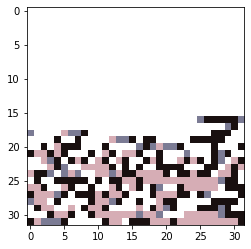

In [104]:
pokemon_random = np.random.randint(0, 1661)
pokemon = Train_data[pokemon_random, :, :, :]
pokemon_label = Train_labels[pokemon_random, :]

plt.imshow(pokemon)
plt.show
print(pokemon_label)

Import VGG

In [ ]:
#VGG pré entraîné sur imagenet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Mon input c'est du 40 40 3
input = Input(shape=(40, 40, 3),name = 'image_input')

output_vgg16_conv = model_vgg16_conv(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model = Model(inputs=input, outputs=x)

my_model.summary()

C'est parti pour l'entraînnement !

In [80]:
my_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-4),
              metrics=['acc'])

In [81]:
print("Train_data shape", np.shape(Train_data))
print("Train labels shape", np.shape(Train_labels))

Train_data shape (1661, 40, 40, 3)
Train labels shape (1661,)


In [ ]:
my_model.fit(Train_data, Train_labels, batch_size=64, epochs=50, steps_per_epoch=2)